In [19]:
# HEALTH INSURANCE LEAD PREDICTION ANN MODEL

# IMPORT THE LIBRARIES
import numpy as np # for numerical computation
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for data visualization


In [20]:
# PART 1. DATA PREPROCESSING

# Cleaning the Dataset
df = pd.read_csv("Machine Problem 1_Rebanal_Princess_Girly_ECE 649_OriginalDataset.csv")
columns_to_remove = ['ID', 'City_Code', 'Region_Code']
df_columns = df.drop(columns=columns_to_remove)
df_clean = df_columns.dropna()


# df_clean.to_csv('Machine Problem 1_Rebanal_Princess_Girly_ECE 649_ProcessedDataset.csv', index=False)
df_clean.info()

In [21]:
# Encoding the "Health Indicator" and "Holding Policy Duration" to Create Dummy Variable
df_clean['Holding_Policy_Duration'].unique()
df_clean['Holding_Policy_Duration'].replace({'14+':15},inplace=True)
df_clean['Holding_Policy_Duration'].fillna(0,inplace=True)
df_clean['Holding_Policy_Duration']=pd.to_numeric(df_clean['Holding_Policy_Duration'])
df_clean['Holding_Policy_Type'].unique()
df_clean['Holding_Policy_Type'].fillna(0,inplace=True)

C:\Users\CESS\AppData\Local\Temp\ipykernel_4052\2858272133.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Holding_Policy_Duration'].replace({'14+':15},inplace=True)
C:\Users\CESS\AppData\Local\Temp\ipykernel_4052\2858272133.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Holding_Policy_Duration'].fillna(0,inplace=True)
C:\Users\CESS\AppData\Local\Temp\ipykernel_4052\2858272133.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Health Indicator' column
df_clean['Health Indicator'] = label_encoder.fit_transform(df_clean['Health Indicator'])

# Print unique values after label encoding
print(df_clean['Health Indicator'].unique())

[0 1 3 2 4 5 7 6 8]


C:\Users\CESS\AppData\Local\Temp\ipykernel_4052\3013801410.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Health Indicator'] = label_encoder.fit_transform(df_clean['Health Indicator'])


In [23]:
# A. Import the Dataset

X = df_clean.iloc[:,0:10].values
Y = df_clean.iloc[:,10].values

print("Features (X):")
print(X)

# Print Y (target variable)
print("\nTarget Variable (Y):")
print(Y)

Features (X):
[['Rented' 'Individual' 36 ... 3.0 22 11628.0]
 ['Owned' 'Joint' 52 ... 3.0 19 17780.0]
 ['Rented' 'Individual' 44 ... 1.0 16 10404.0]
 ...
 ['Rented' 'Individual' 63 ... 1.0 12 11374.0]
 ['Owned' 'Joint' 71 ... 2.0 16 28179.2]
 ['Rented' 'Individual' 24 ... 3.0 18 11424.0]]

Target Variable (Y):
[0 0 0 ... 0 1 0]


In [24]:
#B.2 Label Encoding the "Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse" Columns to convert it to Numeric

from sklearn.preprocessing import LabelEncoder
import numpy as np
label_encoder = LabelEncoder()

In [25]:
X[:, 0] = label_encoder.fit_transform(X[:, 0])  # Label encoding "Accomodation_Type"
X[:, 1] = label_encoder.fit_transform(X[:, 1])  # Label encoding "Reco_Insurance_Type"
X[:, 4] = label_encoder.fit_transform(X[:, 4])  # Label encoding "Is_Spouse"

In [28]:
# Convert entire array to float
X = X.astype(float)

In [29]:
# C. Splitting the Dataset into Training Dataset & Testing Dataset
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0, stratify=None)

In [30]:
# D. Perform Feature Scaling
from sklearn.preprocessing import StandardScaler

X_train_standard = X_train.copy()
X_test_standard = X_test.copy()

standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train_standard)
X_test_standard = standard_scaler.transform(X_test_standard)

In [31]:
# PART 2. BUILDING THE ARTIFICIAL NEURAL NETWORK MODEL

# A. Importing the Keras Libraries and Packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [32]:
# B. Initializing the ANN
classifier = Sequential()

In [33]:
# C. Adding the Input Layer and the First Hidden Layer
classifier.add(Dense(units = 7, kernel_initializer = "glorot_uniform", activation = "relu", input_dim = 10 ))
classifier.add(Dropout(rate = 0.1))

C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# D. Adding the Second Hidden Layer
classifier.add(Dense(units = 6, kernel_initializer = "glorot_uniform", activation = "relu"))
classifier.add(Dropout(rate = 0.1))

In [35]:
# E. Adding the Output Layer
classifier.add(Dense(units = 1, kernel_initializer = "glorot_uniform", activation = "sigmoid"))

In [36]:
# PART 3. TRAINING THE ARTIFICIAL NEURAL NETWORK MODEL

# A. Compiling the ANN 
classifier.compile(optimizer = 'sgd', loss = "binary_crossentropy", metrics = ["accuracy"])

# B. Fitting the ANN Model on the Training Dataset
classifier.fit(x = X_train_standard, y = Y_train, batch_size = 10, epochs = 50)

# C. Summarizing the ANN Model
classifier.summary()


Epoch 1/50
1884/1884 ━━━━━━━━━━━━━━━━━━━━ 2s 794us/step - accuracy: 0.7473 - loss: 0.5909
Epoch 2/50
1884/1884 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.7545 - loss: 0.5592
Epoch 3/50
1884/1884 ━━━━━━━━━━━━━━━━━━━━ 2s 859us/step - accuracy: 0.7650 - loss: 0.5412
Epoch 4/50
1884/1884 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step - accuracy: 0.7565 - loss: 0.5501
Epoch 5/50
1884/1884 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - accuracy: 0.7567 - loss: 0.5486
Epoch 6/50
1884/1884 ━━━━━━━━━━━━━━━━━━━━ 2s 783us/step - accuracy: 0.7583 - loss: 0.5472
Epoch 7/50
1884/1884 ━━━━━━━━━━━━━━━━━━━━ 3s 894us/step - accuracy: 0.7584 - loss: 0.5465
Epoch 8/50
1884/1884 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.7572 - loss: 0.5475
Epoch 9/50
1884/1884 ━━━━━━━━━━━━━━━━━━━━ 2s 794us/step - accuracy: 0.7543 - loss: 0.5509
Epoch 10/50
1884/1884 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - accuracy: 0.7618 - loss: 0.5423
Epoch 11/50
1884/1884 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step - accuracy: 0.7586 - loss: 0.5451
Epoch 12

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134 (540.00 B)

 Trainable params: 132 (528.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [37]:
# PART 4. MAKING PREDICTIONS AND EVALUATING THE ANN MODEL

# A. Predicting the Output of the Testing Dataset

Y_predict_probability = classifier.predict(X_test_standard)
Y_predict = np.rint(Y_predict_probability)

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step


In [38]:
# B. To Generate and Plot the Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_test, Y_predict)


Text(95.72222222222221, 0.5, 'Expected Value')

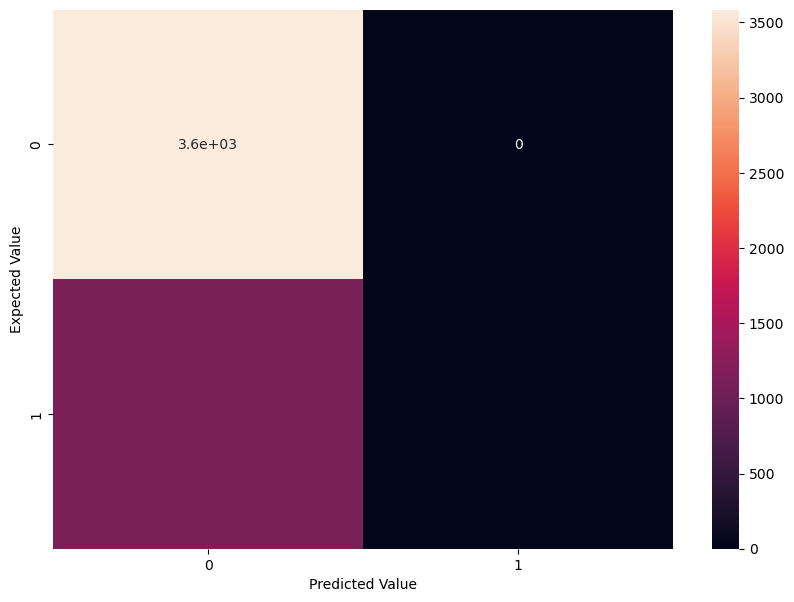

In [39]:
import seaborn as sns
plt.figure(figsize = (10, 7))
sns.heatmap(confusion_matrix, annot = True)
plt.xlabel("Predicted Value")
plt.ylabel("Expected Value")

In [40]:
# C. Computing the Hold-Out Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_predict)
print("Hold-out Accuracy")
print(accuracy)
print("  ")

Hold-out Accuracy
0.7609341825902336
  


In [41]:
# D. Generating the Classification Report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(Y_test, Y_predict, zero_division=0))
print("  ")

Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3584
           1       0.00      0.00      0.00      1126

    accuracy                           0.76      4710
   macro avg       0.38      0.50      0.43      4710
weighted avg       0.58      0.76      0.66      4710

  


In [42]:
# PART 5: PERFORM K-FOLD CROSS-VALIDATION TO ASSESS THE PERFORMANCE OF THE ANN MODEL

# A. To Feature Scale the X Variable Using the StandardScaler
X_standard = X.copy()
X_standard = standard_scaler.fit_transform(X_standard)

# B. Build the ANN Classifier Using the KerasClassifier
from scikeras.wrappers import KerasClassifier 

In [43]:
def classifier(): 
    classifier = Sequential()
    classifier.add(Dense(units = 7, kernel_initializer = "glorot_uniform", activation = "relu", input_dim = 10 ))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 6, kernel_initializer = "glorot_uniform", activation = "relu"))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 1, kernel_initializer = "glorot_uniform", activation = "sigmoid"))
    classifier.compile(optimizer = 'sgd', loss = "binary_crossentropy", metrics = ["accuracy"])
    return classifier

ann_model = KerasClassifier(model = classifier, batch_size = 10, epochs = 50)

In [44]:
# C. Import the StratifiedKFold Class
from sklearn.model_selection import StratifiedKFold

k_fold = StratifiedKFold(n_splits = 10, shuffle = False, random_state = None)


In [45]:
# D. Import the cross_val_score Class
from sklearn.model_selection import cross_val_score

In [46]:
# E. Perform the k-Fold Cross Validation

    # E.1 Using Accuracy as the Scoring Metric for Cross-Valdiation
accuracies = cross_val_score(estimator = ann_model, X = X_standard, y = Y, cv = k_fold, scoring = "accuracy", n_jobs = 1)
accuracies_average = accuracies.mean()
accuracies_deviation = accuracies.std()

print ("Accuracies of k-folds:")
print (accuracies)
print ("  ")
print ("Average Accuracy of k-folds:")
print (accuracies_average)
print ("  ")
print ("Accuracy Deviation of k-folds:")
print (accuracies_deviation)
print ("  ")    

Epoch 1/50


C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 2s 473us/step - accuracy: 0.6784 - loss: 0.6249
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step - accuracy: 0.7570 - loss: 0.5540
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.7577 - loss: 0.5520
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 454us/step - accuracy: 0.7585 - loss: 0.5492
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - accuracy: 0.7640 - loss: 0.5427
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 454us/step - accuracy: 0.7579 - loss: 0.5484
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - accuracy: 0.7577 - loss: 0.5473
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - accuracy: 0.7595 - loss: 0.5450
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - accuracy: 0.7582 - loss: 0.5465
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - accuracy: 0.7539 - loss: 0.5525
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 457us/step - accuracy: 0.7528 - loss: 0.5512
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step - accuracy: 0.7535 - loss: 0.5759
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.7582 - loss: 0.5526
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.7546 - loss: 0.5519
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - accuracy: 0.7598 - loss: 0.5473
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step - accuracy: 0.7507 - loss: 0.5551
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.7594 - loss: 0.5446
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.7585 - loss: 0.5435
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - accuracy: 0.7601 - loss: 0.5429
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step - accuracy: 0.7547 - loss: 0.5495
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - accuracy: 0.7548 - loss: 0.5493
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 578us/step - accuracy: 0.7556 - loss: 0.5457
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 2s 582us/step - accuracy: 0.7549 - loss: 0.5844
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 465us/step - accuracy: 0.7576 - loss: 0.5520
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step - accuracy: 0.7597 - loss: 0.5482
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 508us/step - accuracy: 0.7551 - loss: 0.5516
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 512us/step - accuracy: 0.7514 - loss: 0.5544
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 552us/step - accuracy: 0.7634 - loss: 0.5397
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.7581 - loss: 0.5461
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - accuracy: 0.7576 - loss: 0.5475
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step - accuracy: 0.7583 - loss: 0.5447
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 452us/step - accuracy: 0.7522 - loss: 0.5514
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.7541 - loss: 0.5499
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 2s 587us/step - accuracy: 0.6906 - loss: 0.6225
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 569us/step - accuracy: 0.7532 - loss: 0.5579
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 550us/step - accuracy: 0.7624 - loss: 0.5458
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 557us/step - accuracy: 0.7590 - loss: 0.5502
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - accuracy: 0.7569 - loss: 0.5518
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - accuracy: 0.7589 - loss: 0.5496
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 557us/step - accuracy: 0.7545 - loss: 0.5529
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 550us/step - accuracy: 0.7649 - loss: 0.5411
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - accuracy: 0.7571 - loss: 0.5488
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - accuracy: 0.7564 - loss: 0.5496
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 565us/step - accuracy: 0.7638 - loss: 0.5416
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 2s 571us/step - accuracy: 0.6962 - loss: 0.6234
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step - accuracy: 0.7527 - loss: 0.5597
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 527us/step - accuracy: 0.7557 - loss: 0.5556
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 536us/step - accuracy: 0.7592 - loss: 0.5509
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 573us/step - accuracy: 0.7611 - loss: 0.5491
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - accuracy: 0.7563 - loss: 0.5533
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - accuracy: 0.7580 - loss: 0.5512
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 592us/step - accuracy: 0.7600 - loss: 0.5466
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - accuracy: 0.7591 - loss: 0.5473
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step - accuracy: 0.7577 - loss: 0.5462
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - accuracy: 0.7508 - loss: 0.5546
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 2s 446us/step - accuracy: 0.6827 - loss: 0.6221
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step - accuracy: 0.7600 - loss: 0.5514
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 452us/step - accuracy: 0.7585 - loss: 0.5509
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.7562 - loss: 0.5540
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.7522 - loss: 0.5581
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - accuracy: 0.7595 - loss: 0.5475
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step - accuracy: 0.7558 - loss: 0.5512
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 471us/step - accuracy: 0.7557 - loss: 0.5501
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 510us/step - accuracy: 0.7565 - loss: 0.5502
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step - accuracy: 0.7578 - loss: 0.5467
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - accuracy: 0.7554 - loss: 0.5489
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - accuracy: 0.7374 - loss: 0.5800
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.7587 - loss: 0.5516
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step - accuracy: 0.7572 - loss: 0.5505
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.7574 - loss: 0.5496
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 452us/step - accuracy: 0.7585 - loss: 0.5462
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 440us/step - accuracy: 0.7599 - loss: 0.5457
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.7572 - loss: 0.5482
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 433us/step - accuracy: 0.7551 - loss: 0.5496
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 452us/step - accuracy: 0.7552 - loss: 0.5513
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - accuracy: 0.7593 - loss: 0.5453
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 433us/step - accuracy: 0.7602 - loss: 0.5438
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step - accuracy: 0.7338 - loss: 0.5862
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 481us/step - accuracy: 0.7555 - loss: 0.5561
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - accuracy: 0.7613 - loss: 0.5474
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 434us/step - accuracy: 0.7628 - loss: 0.5432
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 424us/step - accuracy: 0.7611 - loss: 0.5445
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 417us/step - accuracy: 0.7622 - loss: 0.5429
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 440us/step - accuracy: 0.7572 - loss: 0.5481
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 424us/step - accuracy: 0.7585 - loss: 0.5467
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 440us/step - accuracy: 0.7531 - loss: 0.5525
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 457us/step - accuracy: 0.7586 - loss: 0.5482
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 425us/step - accuracy: 0.7583 - loss: 0.5456
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.7123 - loss: 0.5966
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step - accuracy: 0.7573 - loss: 0.5542
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 434us/step - accuracy: 0.7550 - loss: 0.5532
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 425us/step - accuracy: 0.7556 - loss: 0.5513
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 425us/step - accuracy: 0.7649 - loss: 0.5414
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 440us/step - accuracy: 0.7532 - loss: 0.5527
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 421us/step - accuracy: 0.7575 - loss: 0.5485
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 432us/step - accuracy: 0.7610 - loss: 0.5423
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step - accuracy: 0.7607 - loss: 0.5411
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 428us/step - accuracy: 0.7563 - loss: 0.5474
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 488us/step - accuracy: 0.7538 - loss: 0.5502
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 434us/step - accuracy: 0.7265 - loss: 0.5926
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 409us/step - accuracy: 0.7548 - loss: 0.5549
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 440us/step - accuracy: 0.7599 - loss: 0.5483
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - accuracy: 0.7579 - loss: 0.5483
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step - accuracy: 0.7577 - loss: 0.5490
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 432us/step - accuracy: 0.7607 - loss: 0.5447
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 433us/step - accuracy: 0.7563 - loss: 0.5477
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 520us/step - accuracy: 0.7610 - loss: 0.5432
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 433us/step - accuracy: 0.7591 - loss: 0.5441
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step - accuracy: 0.7605 - loss: 0.5450
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 433us/step - accuracy: 0.7627 - loss: 0.5401
Epoch 12/50
2120/21

In [84]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score

In [47]:
# E.2 Using F1-Score as the Scoring Metric for Cross-Valdiation

f1 = cross_val_score(estimator=ann_model, X=X_standard, y=Y, cv=k_fold, scoring='f1', n_jobs=1)
f1_average = f1.mean()
f1_deviation = f1.std()
    
print ("F1-Scores of k-folds:")
print (f1)
print ("  ")
print ("Average F1-Score of k-folds:")
print (f1_average)
print ("  ")
print ("F1-Score Deviation of k-folds:")
print (f1_deviation)
print ("  ")    


Epoch 1/50


C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 2s 466us/step - accuracy: 0.7055 - loss: 0.6071
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step - accuracy: 0.7582 - loss: 0.5535
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - accuracy: 0.7618 - loss: 0.5485
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - accuracy: 0.7618 - loss: 0.5479
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - accuracy: 0.7595 - loss: 0.5499
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.7591 - loss: 0.5498
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - accuracy: 0.7604 - loss: 0.5480
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 459us/step - accuracy: 0.7605 - loss: 0.5465
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - accuracy: 0.7515 - loss: 0.5573
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 459us/step - accuracy: 0.7581 - loss: 0.5488
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - accuracy: 0.7629 - loss: 0.5429
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 2s 519us/step - accuracy: 0.6993 - loss: 0.6145
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step - accuracy: 0.7593 - loss: 0.5514
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 465us/step - accuracy: 0.7586 - loss: 0.5464
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 432us/step - accuracy: 0.7550 - loss: 0.5497
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - accuracy: 0.7635 - loss: 0.5406
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 492us/step - accuracy: 0.7558 - loss: 0.5480
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step - accuracy: 0.7560 - loss: 0.5472
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step - accuracy: 0.7566 - loss: 0.5469
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 496us/step - accuracy: 0.7613 - loss: 0.5411
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - accuracy: 0.7617 - loss: 0.5405
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step - accuracy: 0.7626 - loss: 0.5402
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.7608 - loss: 0.5655
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 441us/step - accuracy: 0.7592 - loss: 0.5536
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 424us/step - accuracy: 0.7554 - loss: 0.5502
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 432us/step - accuracy: 0.7603 - loss: 0.5472
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 440us/step - accuracy: 0.7570 - loss: 0.5483
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step - accuracy: 0.7591 - loss: 0.5462
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - accuracy: 0.7548 - loss: 0.5495
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.7563 - loss: 0.5503
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - accuracy: 0.7557 - loss: 0.5478
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step - accuracy: 0.7552 - loss: 0.5500
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step - accuracy: 0.7603 - loss: 0.5425
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 2s 502us/step - accuracy: 0.7330 - loss: 0.5832
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 488us/step - accuracy: 0.7525 - loss: 0.5576
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.7561 - loss: 0.5535
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 498us/step - accuracy: 0.7582 - loss: 0.5469
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - accuracy: 0.7589 - loss: 0.5456
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 511us/step - accuracy: 0.7620 - loss: 0.5410
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 436us/step - accuracy: 0.7612 - loss: 0.5425
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - accuracy: 0.7524 - loss: 0.5522
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - accuracy: 0.7558 - loss: 0.5479
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 531us/step - accuracy: 0.7617 - loss: 0.5405
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.7587 - loss: 0.5443
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.7574 - loss: 0.5830
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step - accuracy: 0.7590 - loss: 0.5522
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step - accuracy: 0.7548 - loss: 0.5536
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - accuracy: 0.7578 - loss: 0.5496
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 569us/step - accuracy: 0.7582 - loss: 0.5481
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.7578 - loss: 0.5473
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 460us/step - accuracy: 0.7558 - loss: 0.5488
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 440us/step - accuracy: 0.7577 - loss: 0.5459
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step - accuracy: 0.7600 - loss: 0.5437
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step - accuracy: 0.7527 - loss: 0.5524
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.7625 - loss: 0.5400
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 2s 471us/step - accuracy: 0.7037 - loss: 0.6192
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 467us/step - accuracy: 0.7559 - loss: 0.5578
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 510us/step - accuracy: 0.7604 - loss: 0.5514
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step - accuracy: 0.7607 - loss: 0.5507
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.7558 - loss: 0.5542
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 529us/step - accuracy: 0.7613 - loss: 0.5472
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 497us/step - accuracy: 0.7606 - loss: 0.5470
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step - accuracy: 0.7570 - loss: 0.5488
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 503us/step - accuracy: 0.7570 - loss: 0.5497
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - accuracy: 0.7537 - loss: 0.5518
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 506us/step - accuracy: 0.7626 - loss: 0.5432
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 2s 503us/step - accuracy: 0.6872 - loss: 0.6230
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - accuracy: 0.7637 - loss: 0.5428
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 490us/step - accuracy: 0.7610 - loss: 0.5451
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 485us/step - accuracy: 0.7535 - loss: 0.5526
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.7539 - loss: 0.5510
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 505us/step - accuracy: 0.7612 - loss: 0.5434
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 503us/step - accuracy: 0.7575 - loss: 0.5480
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 499us/step - accuracy: 0.7548 - loss: 0.5493
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 511us/step - accuracy: 0.7617 - loss: 0.5419
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 518us/step - accuracy: 0.7585 - loss: 0.5450
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step - accuracy: 0.7604 - loss: 0.5426
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7427 - loss: 0.5859
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7556 - loss: 0.5573
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7569 - loss: 0.5534
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7537 - loss: 0.5535
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7581 - loss: 0.5476
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7561 - loss: 0.5495
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7541 - loss: 0.5509
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7589 - loss: 0.5453
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7581 - loss: 0.5459
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7557 - loss: 0.5493
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7543 - loss: 0.5504
Epoch 12/50
2120/2120 ━━━━━━━━━━━━━━━━━━━

C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 2s 566us/step - accuracy: 0.7559 - loss: 0.5806
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 2s 727us/step - accuracy: 0.7572 - loss: 0.5547
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - accuracy: 0.7527 - loss: 0.5563
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 514us/step - accuracy: 0.7569 - loss: 0.5519
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.7590 - loss: 0.5486
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - accuracy: 0.7602 - loss: 0.5452
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - accuracy: 0.7642 - loss: 0.5405
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 573us/step - accuracy: 0.7602 - loss: 0.5455
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 495us/step - accuracy: 0.7570 - loss: 0.5466
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 507us/step - accuracy: 0.7574 - loss: 0.5470
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 504us/step - accuracy: 0.7583 - loss: 0.5463
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 2s 556us/step - accuracy: 0.7559 - loss: 0.5844
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 551us/step - accuracy: 0.7508 - loss: 0.5574
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 535us/step - accuracy: 0.7550 - loss: 0.5539
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 518us/step - accuracy: 0.7637 - loss: 0.5426
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 520us/step - accuracy: 0.7609 - loss: 0.5440
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 521us/step - accuracy: 0.7536 - loss: 0.5520
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - accuracy: 0.7567 - loss: 0.5479
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.7564 - loss: 0.5480
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 551us/step - accuracy: 0.7572 - loss: 0.5468
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/step - accuracy: 0.7579 - loss: 0.5460
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 513us/step - accuracy: 0.7639 - loss: 0.5389
Epoch 12/50
2120/21

In [48]:
    # E.3 Using Precision as the Scoring Metric for Cross-Valdiation
precision = cross_val_score(estimator = ann_model, X = X_standard, y = Y, cv = k_fold, scoring = "precision", n_jobs = 1)
precision_average = precision.mean()
precision_deviation = precision.std()
    
print ("Precision of k-folds:")
print (precision)
print ("  ")
print ("Average Precision of k-folds:")
print (precision_average)
print ("  ")
print ("Precision Deviation of k-folds:")
print (precision_deviation)
print ("  ")    

Epoch 1/50


C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 501us/step - accuracy: 0.7556 - loss: 0.5707
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 489us/step - accuracy: 0.7588 - loss: 0.5509
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - accuracy: 0.7547 - loss: 0.5514
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step - accuracy: 0.7524 - loss: 0.5535
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 535us/step - accuracy: 0.7566 - loss: 0.5487
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - accuracy: 0.7558 - loss: 0.5493
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 573us/step - accuracy: 0.7583 - loss: 0.5460
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step - accuracy: 0.7514 - loss: 0.5535
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 501us/step - accuracy: 0.7554 - loss: 0.5468
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 524us/step - accuracy: 0.7520 - loss: 0.5519
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 498us/step - accuracy: 0.7604 - loss: 0.5410
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 2s 535us/step - accuracy: 0.7368 - loss: 0.5888
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 497us/step - accuracy: 0.7587 - loss: 0.5529
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 499us/step - accuracy: 0.7550 - loss: 0.5524
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 504us/step - accuracy: 0.7597 - loss: 0.5456
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - accuracy: 0.7602 - loss: 0.5439
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 541us/step - accuracy: 0.7589 - loss: 0.5480
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 577us/step - accuracy: 0.7588 - loss: 0.5451
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 485us/step - accuracy: 0.7579 - loss: 0.5468
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 471us/step - accuracy: 0.7545 - loss: 0.5492
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step - accuracy: 0.7570 - loss: 0.5479
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step - accuracy: 0.7618 - loss: 0.5412
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - accuracy: 0.7553 - loss: 0.5776
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - accuracy: 0.7555 - loss: 0.5542
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 497us/step - accuracy: 0.7557 - loss: 0.5522
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 523us/step - accuracy: 0.7554 - loss: 0.5506
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - accuracy: 0.7601 - loss: 0.5450
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 530us/step - accuracy: 0.7627 - loss: 0.5425
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step - accuracy: 0.7492 - loss: 0.5555
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 515us/step - accuracy: 0.7579 - loss: 0.5476
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 488us/step - accuracy: 0.7611 - loss: 0.5417
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 496us/step - accuracy: 0.7586 - loss: 0.5450
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step - accuracy: 0.7575 - loss: 0.5468
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 2s 525us/step - accuracy: 0.7166 - loss: 0.5927
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 605us/step - accuracy: 0.7558 - loss: 0.5540
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step - accuracy: 0.7581 - loss: 0.5508
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step - accuracy: 0.7557 - loss: 0.5514
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - accuracy: 0.7594 - loss: 0.5478
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 452us/step - accuracy: 0.7588 - loss: 0.5459
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step - accuracy: 0.7584 - loss: 0.5459
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 410us/step - accuracy: 0.7618 - loss: 0.5420
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step - accuracy: 0.7614 - loss: 0.5429
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - accuracy: 0.7574 - loss: 0.5453
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.7543 - loss: 0.5487
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 2s 516us/step - accuracy: 0.7287 - loss: 0.5991
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 462us/step - accuracy: 0.7573 - loss: 0.5551
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.7608 - loss: 0.5499
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.7559 - loss: 0.5546
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 445us/step - accuracy: 0.7560 - loss: 0.5527
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - accuracy: 0.7597 - loss: 0.5472
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - accuracy: 0.7593 - loss: 0.5483
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step - accuracy: 0.7596 - loss: 0.5458
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step - accuracy: 0.7610 - loss: 0.5443
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - accuracy: 0.7554 - loss: 0.5483
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 481us/step - accuracy: 0.7595 - loss: 0.5450
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - accuracy: 0.6804 - loss: 0.6219
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.7553 - loss: 0.5571
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 520us/step - accuracy: 0.7543 - loss: 0.5575
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 527us/step - accuracy: 0.7563 - loss: 0.5550
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - accuracy: 0.7618 - loss: 0.5483
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 511us/step - accuracy: 0.7585 - loss: 0.5515
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 573us/step - accuracy: 0.7621 - loss: 0.5470
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 527us/step - accuracy: 0.7549 - loss: 0.5545
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 504us/step - accuracy: 0.7598 - loss: 0.5497
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - accuracy: 0.7551 - loss: 0.5551
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 518us/step - accuracy: 0.7563 - loss: 0.5527
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.7100 - loss: 0.6025
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 433us/step - accuracy: 0.7575 - loss: 0.5528
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - accuracy: 0.7603 - loss: 0.5467
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 525us/step - accuracy: 0.7611 - loss: 0.5447
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step - accuracy: 0.7603 - loss: 0.5459
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 529us/step - accuracy: 0.7602 - loss: 0.5455
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 514us/step - accuracy: 0.7542 - loss: 0.5504
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 510us/step - accuracy: 0.7597 - loss: 0.5448
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 529us/step - accuracy: 0.7532 - loss: 0.5528
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 527us/step - accuracy: 0.7604 - loss: 0.5441
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 529us/step - accuracy: 0.7552 - loss: 0.5481
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 2s 528us/step - accuracy: 0.7527 - loss: 0.5643
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - accuracy: 0.7584 - loss: 0.5519
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 623us/step - accuracy: 0.7554 - loss: 0.5518
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 536us/step - accuracy: 0.7584 - loss: 0.5481
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - accuracy: 0.7524 - loss: 0.5533
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 525us/step - accuracy: 0.7612 - loss: 0.5435
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 521us/step - accuracy: 0.7596 - loss: 0.5456
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - accuracy: 0.7594 - loss: 0.5451
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - accuracy: 0.7585 - loss: 0.5454
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - accuracy: 0.7592 - loss: 0.5445
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - accuracy: 0.7597 - loss: 0.5445
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 2s 518us/step - accuracy: 0.7150 - loss: 0.6060
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 510us/step - accuracy: 0.7577 - loss: 0.5552
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - accuracy: 0.7530 - loss: 0.5562
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 496us/step - accuracy: 0.7577 - loss: 0.5524
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 509us/step - accuracy: 0.7555 - loss: 0.5513
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 510us/step - accuracy: 0.7617 - loss: 0.5446
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 511us/step - accuracy: 0.7574 - loss: 0.5479
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step - accuracy: 0.7572 - loss: 0.5484
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 524us/step - accuracy: 0.7538 - loss: 0.5532
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - accuracy: 0.7539 - loss: 0.5507
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 507us/step - accuracy: 0.7602 - loss: 0.5443
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 2s 533us/step - accuracy: 0.7393 - loss: 0.5952
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 498us/step - accuracy: 0.7545 - loss: 0.5583
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 439us/step - accuracy: 0.7519 - loss: 0.5594
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - accuracy: 0.7579 - loss: 0.5524
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.7600 - loss: 0.5484
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - accuracy: 0.7566 - loss: 0.5511
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 525us/step - accuracy: 0.7583 - loss: 0.5486
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 525us/step - accuracy: 0.7570 - loss: 0.5483
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 535us/step - accuracy: 0.7595 - loss: 0.5451
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 518us/step - accuracy: 0.7659 - loss: 0.5377
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 535us/step - accuracy: 0.7609 - loss: 0.5428
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
    # E.4 Using Recall as the Scoring Metric for Cross-Valdiation
recall = cross_val_score(estimator = ann_model, X = X_standard, y = Y, cv = k_fold, scoring = "recall", n_jobs = 1)
recall_average = recall.mean()
recall_deviation = recall.std()
    
print ("Recall of k-folds:")
print (recall)
print ("  ")
print ("Average Recall of k-folds:")
print (recall_average)
print ("  ")
print ("Recall Deviation of k-folds:")
print (recall_deviation)
print ("  ")   

Epoch 1/50


C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 2s 510us/step - accuracy: 0.7327 - loss: 0.5819
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 527us/step - accuracy: 0.7589 - loss: 0.5526
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 507us/step - accuracy: 0.7625 - loss: 0.5453
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 510us/step - accuracy: 0.7588 - loss: 0.5493
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step - accuracy: 0.7589 - loss: 0.5458
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 518us/step - accuracy: 0.7540 - loss: 0.5523
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 513us/step - accuracy: 0.7583 - loss: 0.5455
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 532us/step - accuracy: 0.7580 - loss: 0.5454
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 533us/step - accuracy: 0.7605 - loss: 0.5426
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 504us/step - accuracy: 0.7559 - loss: 0.5488
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - accuracy: 0.7549 - loss: 0.5493
Epoch 12/50
2120/21

C:\Users\CESS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2120/2120 ━━━━━━━━━━━━━━━━━━━━ 2s 548us/step - accuracy: 0.7283 - loss: 0.5929
Epoch 2/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - accuracy: 0.7551 - loss: 0.5567
Epoch 3/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 550us/step - accuracy: 0.7623 - loss: 0.5454
Epoch 4/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - accuracy: 0.7573 - loss: 0.5502
Epoch 5/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - accuracy: 0.7596 - loss: 0.5465
Epoch 6/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - accuracy: 0.7637 - loss: 0.5421
Epoch 7/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 542us/step - accuracy: 0.7530 - loss: 0.5524
Epoch 8/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 543us/step - accuracy: 0.7619 - loss: 0.5416
Epoch 9/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step - accuracy: 0.7578 - loss: 0.5452
Epoch 10/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step - accuracy: 0.7573 - loss: 0.5474
Epoch 11/50
2120/2120 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step - accuracy: 0.7523 - loss: 0.5517
Epoch 12/50
2120/21

In [ ]:
    # E.5 Using ROC-AUC as the Scoring Metric for Cross-Valdiation
roc_auc = cross_val_score(estimator = ann_model, X = X_standard, y = Y, cv = k_fold, scoring = "roc_auc", n_jobs = 1)
roc_auc_average = roc_auc.mean()
roc_auc_deviation = roc_auc.std()
    
print ("ROC-AUC of k-folds:")
print (roc_auc)
print ("  ")
print ("Average ROC-AUC of k-folds:")
print (roc_auc_average)
print ("  ")
print ("ROC-AUC Deviation of k-folds:")
print (roc_auc_deviation)
print ("  ")   
